In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
full=cv2.imread("sammy.jpg")
full=cv2.cvtColor(full,cv2.COLOR_BGR2RGB)

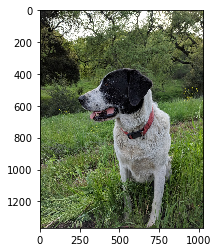

In [7]:
plt.imshow(full)

In [8]:
full.shape

(1367, 1025, 3)

<h3>Template Image <br></h3>
A subset of the image . Note how its actually the exact image. 

In [10]:
face=cv2.imread("sammy_face.jpg")
face=cv2.cvtColor(face,cv2.COLOR_BGR2RGB)

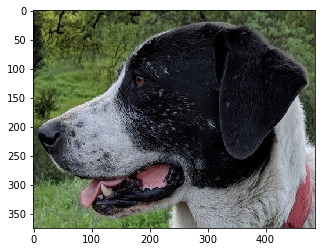

In [11]:
plt.imshow(face)

<b><h2> eval() function in case you havent seen it before

In [12]:
sum([1,2,3])

6

In [13]:
mystring='sum'

In [15]:
mystring([1,2,3]) # Getting the error

TypeError: 'str' object is not callable

In [16]:
eval(mystring)

<function sum(iterable, start=0, /)>

In [17]:
myfunc=eval(mystring)

In [19]:
myfunc([1,2,3])

6

In [20]:
height,width,channels=face.shape

In [21]:
width

486

In [22]:
height

375

In [28]:
# The full Image to search
full=cv2.imread("sammy.jpg")
full=cv2.cvtColor(full,cv2.COLOR_BGR2RGB)

# The template to Match
face=cv2.imread("sammy_face.jpg")
face=cv2.cvtColor(face,cv2.COLOR_BGR2RGB)

# All the 6 methods for comparism in a list
# Note how we are using, stringd , later on we will use the eval()
# Function to convert to function
methods=['cv2.TM_CCOEFF','cv2.TM_CCOEFF','cv2.TM_CCORR','cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']


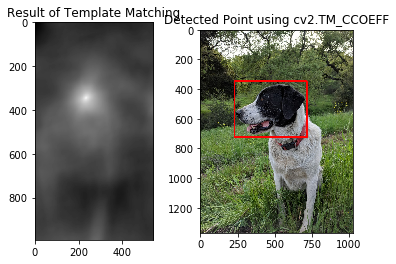

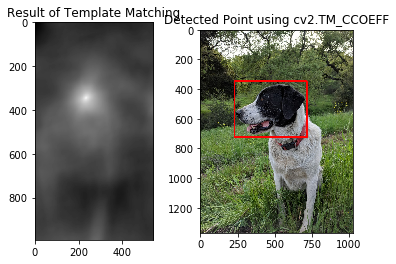

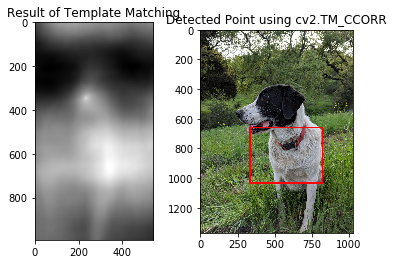

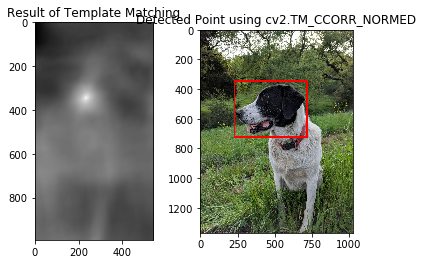

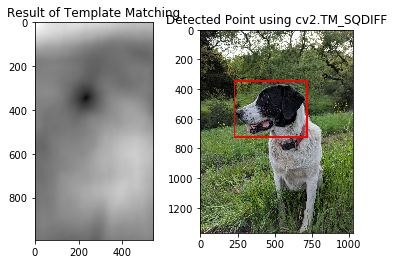

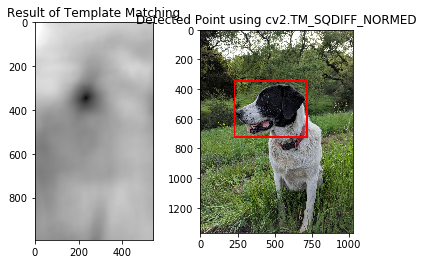

In [29]:


# Loop over each method
for m in methods:
    full_copy = full.copy()
    
    method = eval(m)
    
    # Apply template matching
    res = cv2.matchTemplate(full_copy, face, method)
    
    # Get the min/max values and locations
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # Determine the top left corner of the rectangle
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
        
    # Determine the bottom right corner of the rectangle
    bottom_right = (top_left[0] + width, top_left[1] + height)
    
    # Draw the rectangle on the full_copy image
    cv2.rectangle(full_copy, top_left, bottom_right, 255, 10)
    
    # Display the result
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Result of Template Matching')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title(f"Detected Point using {m}")
    
    plt.show()
    print('\n\n')
